# HW1 Part 2: Linear Regression Notebook


In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import warnings
warnings.filterwarnings('ignore')
# Displays the plots in notebook
%matplotlib inline

<a class="anchor" id="third-bullet"></a>
## Linear Regression

We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with four observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3, 4$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 0), (2, 2), (3, 4), (5, 5)\}
\end{equation*}

As we discussed in the lecture, we want to fit a model $y=\beta_0 + \beta_1 x$ given these observations by minimizing the mean square error (MSE).

<div class="exercise"><b>Exercise</b></div>

* Make two numpy arrays out of this data, x_train and y_train
* Check the dimentions of these arrays
* Try to reshape them into a different shape
* Make points into a very simple scatterplot
* Make a better scatterplot
  * Adding axis labels
  * legend
  * title
  * anything else in Matplotlib to make it look pretty

In [ ]:
# your code here
x_train =
y_train =


#### Closed-form solution

For the single predictor case, we have the following explicit solution:
    \begin{align}
      \beta_1 &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      \beta_0 &= \bar{y} - \beta_1\bar{x}\
    \end{align}
    
where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively.

###  Building a model from scratch
In this part, we will solve the equations for simple linear regression and find the best fit solution to our toy problem.

The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

We have to reshape our arrrays to 2D because each row correspondes to one observation.

<div class="exercise"><b>Exercise</b></div>

* make an array with shape (2,3)
* reshape it to a size that you want

In [ ]:
# your code here

In [ ]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
#x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(y_train.shape[0], 1)
print(x_train.shape,y_train.shape)

In [ ]:
# first, compute means
# your code here

# build the two terms, remember the element-wise computation in numpy array
# your code here

print(numerator, denominator) #check results

In [ ]:
#slope beta1
# your code here
beta_1 =

#intercept beta0
# your code here
beta_2 =

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))

<div class="exercise"><b>Exercise</b></div>

Next, you can write a function called `simple_linear_regression_fit`, that inputs the 1-D training data and returns `beta0` and `beta1`.

```python
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    
    return
```

Check your function by calling it with the training data from above and printing out the beta values.

In [ ]:
# Your code here

* Let's run this function and see the coefficients

In [ ]:
x_train = np.array([1 ,2, 3, 5])
y_train = np.array([0, 2, 4, 5])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

<div class="exercise"><b>Exercise</b></div>

* Do the values of `beta0` and `beta1` seem reasonable?
* Plot the training data using a scatter plot.
* Plot the best fit line with `beta0` and `beta1` together with the training data.

In [ ]:
# Your code here

The values of `beta0` and `beta1` seem roughly reasonable.  They capture the positive correlation.  The line does appear to be trying to get as close as possible to all the points.

<div class="Exercise to be Done"><b>[10 pts] Exercise to be Done:</b></div>

* Add a cell to run a polynomial regression with the following form for the toy dataset, i.e., $$y=β_0+β_1 x^2$$ Note, you do not need to implement polynomial regression, but just change your dataset.
* Are the values of 'beta0' and 'beta1' reasonable?

In [ ]:
####################### ToDo ####################################
## create the new features

## fit the data with linear regression function simple_linear_regression_fit

In [ ]:
# First create X^2 and then fit linear regression

<a class="anchor" id="fourth-bullet"></a>
## Building a model with `statsmodels` and `sklearn`

Now that we can concretely fit the training data from scratch, let's learn two `python` packages to do it all for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from `statsmodels` and `sklearn` to the $\beta$ values that we found from above with our own implementation.

`statsmodels` tends to be easier for inference \[finding the values of the slope and intercept and dicussing uncertainty in those values\], whereas `sklearn` has machine-learning algorithms and is better for prediction \[guessing y values for a given x value\]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

**Note:** `statsmodels` and `sklearn` are different packages!  Unless we specify otherwise, you can use either one.

Below is the code for `statsmodels`.  `Statsmodels` does not by default include the column of ones in the $X$ matrix (coresponding to the intercept), so we include it manually with `sm.add_constant`.

In [ ]:
import statsmodels.api as sm

In [ ]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

Now let's turn our attention to the `sklearn` library.

In [ ]:
from sklearn import linear_model

In [ ]:
# build the least squares model
toyregr = linear_model.LinearRegression()

print(x_train.shape,y_train.shape)
# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

We should feel pretty good about ourselves now, and we're ready to move on to a real problem!

### The `scikit-learn` library and the shape of things

Before diving into a "real" problem, let's discuss more of the details of `sklearn`.

`Scikit-learn` is the main `Python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split()`.

Use the following to add the library into your code:

```python
import sklearn
```

In `scikit-learn`, an **estimator** is a Python object that implements the methods `fit(X, y)` and `predict(T)`

Let's see the structure of `scikit-learn` needed to make these fits. `fit()` always takes two arguments:
```python
estimator.fit(xtrain, ytrain)
```
We will consider two estimators in this lab: `LinearRegression` and `KNeighborsRegressor`.

It is very important to understand that `xtrain` must be in the form of a **2x2 array** with each row corresponding to one sample, and each column corresponding to the feature values for that sample.

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

![](../images/featurematrix.png)

<!--![](../images/sklearn2.jpg)-->

### Practice with `sklearn` and a real dataset
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon
- `cyl` is Number of cylinders,
- `disp` is	Displacement (cu.in.),
- `hp` is	Gross horsepower,
- `drat` is	Rear axle ratio,
- `wt` is the Weight (1000 lbs),
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight),
- `am` is Transmission (0 = automatic, 1 = manual),
- `gear` is the Number of forward gears,
- `carb` is	Number of carburetors.

In [ ]:
import pandas as pd
#load mtcars
dfcars = pd.read_csv("https://drive.google.com/uc?id=1w1ZSgMOQDckFNirc5HnpdeJeJ6hVlLE6")
dfcars.head()

In [ ]:
# Fix the column title
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

In [ ]:
dfcars.shape

#### Searching for values: how many cars have 4 gears?

In [ ]:
len(dfcars[dfcars.gear == 4].drop_duplicates(subset='car name', keep='first'))

Next, let's split the dataset into a training set and test set.

In [ ]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [ ]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Now we have training and test data.  We still need to select a predictor and a response from this dataset.  Keep in mind that we need to choose the predictor and response from both the training and test set.  You will do this in the exercises below.  However, we provide some starter code for you to get things going.

In [ ]:
traindf.head()

In [ ]:
# Extract the response variable that we're interested in
y_train = traindf.mpg
y_train

In [ ]:
y_train.shape, type(y_train)

### Array reshape
This is a 1D array as should be the case with the **Y** array.  Remember, `sklearn` requires a 2D array only for the predictor array.  You will have to pay close attention to this in the exercises later. `Sklearn` doesn't care too much about the shape of `y_train`.

The whole reason we went through that whole process was to show you how to reshape your data into the correct format.

**IMPORTANT:** Remember that your response variable `ytrain` can be a vector but your predictor variable `xtrain` ***must*** be an array!

<a class="anchor" id="fifth-bullet"></a>
## Example: Simple linear regression with automobile data
We will now use `sklearn` to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

We need to choose the variables that we think will be good predictors for the response `mpg`.

<div class="exercise"><b>Exercise</b></div>

* Pick one variable to use as a predictor for simple linear regression.
* Justify your choice with some visualizations.  
* Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?

In [ ]:
x_wt = dfcars.wt
x_wt.shape

In [ ]:
# Your code here

<div class="exercise"><b>Exercise</b></div>

* Use `sklearn` to fit the training data using simple linear regression.
* Use the model to make mpg predictions on the test set.  
* Plot the data and the prediction.  
* Print out the mean squared error for the training set and the test set and compare.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dfcars = pd.read_csv("https://drive.google.com/uc?id=1w1ZSgMOQDckFNirc5HnpdeJeJ6hVlLE6")
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

In [ ]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [ ]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

In [ ]:
# train and test shape
y_train.shape, X_train.shape

In [ ]:
y_test.shape, X_test.shape

In [ ]:
#create linear model
# your code here
regression =

#fit linear model
# your code here

predicted_y =

r2 = regression.score(X_test, y_test)
print(f'R^2 = {r2:.5}')

In [ ]:
print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

In [ ]:
# Plot predicted y vs actual y
# your code here

# Plot the data and your regression line
# your code here


<div class="Exercise"><b>[10 pts] Exercise to be done: </b></div>

* Pick two predictors, prepare training and test data.
* Use `sklearn` to fit the training data using multiple linear regression.
* Use the model to make mpg predictions on the test set.
* Print out the MSE on test dataset.

In [ ]:
 ###### Your solution here #################

## Bootstrap
Run the following code to understand bootstrap.

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor

In [ ]:
x = np.linspace(0, 10, 20)
y=x + np.random.randn(len(x))

In [ ]:
n_estimators = 1000
model = BaggingRegressor(linear_model.LinearRegression(),
                         n_estimators=n_estimators,
                         bootstrap=True,max_samples=20)

In [ ]:
model.fit(x.reshape(20,1), y)

In [ ]:
intercept=[]
beta1=[]
for m in model.estimators_:
    intercept.append(m.intercept_)
    beta1.append(m.coef_[0])

In [ ]:
np.std(intercept),np.std(beta1),np.mean(intercept),np.mean(beta1)

<div class="exercise"><b>[5 pts (bonus)] Exercise to be done:</b></div>

*What is the 95% confidence interval for beta1?

> Hint: Either call a [library function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html), or compute on your own, where $Z$ score of confidence level 95% is approximately $1.96$.

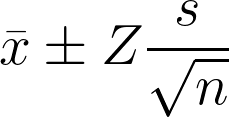

In [ ]:
# Hint: Either call a library function, or compute on your own, where  Z  score of confidence level 95% is approximately  1.96 .
# your code here